In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# параметры слоев
E1 = 1000
E2 = 200
E3 = 2000
h = 0.5
b = 10
L = 200
F = 0.1

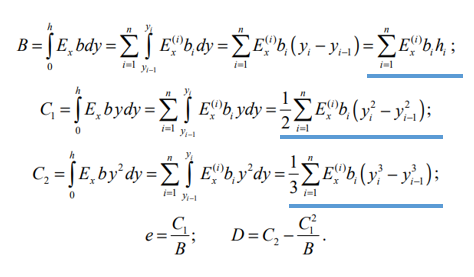

In [4]:
# Вычисляем изгибную жесткость D по формулам выше
B = b* h *(E1 + E2 + E1+ E3*2)
C1 = 1/2*b* ( E1*(h**2) + E2*( (2*h)**2 - h**2 ) +E3*( (4*h)**2 - (2*h)**2) + E1*( (5*h)**2 - (4*h)**2 ) )
C2 = 1/3*b* ( E1*(h**3) + E2*( (2*h)**3 - h**3 ) +E3*( (4*h)**3 - (2*h)**3) + E1*( (5*h)**3 - (4*h)**3 ) )
D = C2 - C1**2/B
e = C1/B
print(C1)
print(D)

43250.0
12742.607526881715


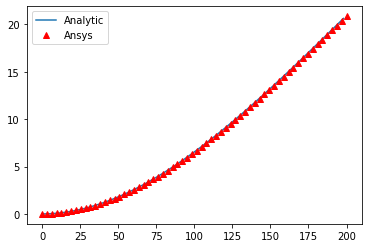

In [5]:
def w(x):
    return (-1/6*F*x**3 + 1/2*F*L*x**2)/D

x = np.arange(0, L, 2)
y = w(x)

x_ansys = [0,3.1746,6.3492,9.5238,12.698,15.873,19.048,22.222,25.397,28.571,31.746,34.921,38.095,41.27,44.444,47.619,50.794,53.968,57.143,60.317,63.492,66.667,69.841,73.016,76.19,79.365,82.54,85.714,88.889,92.063,95.238,98.413,101.59,104.76,107.94,111.11,114.29,117.46,120.63,123.81,126.98,130.16,133.33,136.51,139.68,142.86,146.03,149.21,152.38,155.56,158.73,161.9,165.08,168.25,171.43,174.6,177.78,180.95,184.13,187.3,190.48,193.65,196.83,200]
y_ansys = [1.3373e-014,5.3243e-003,2.6922e-002,6.4214e-002,0.11673,0.1841,0.26604,0.36231,0.47263,0.59676,0.73445,0.88545,1.0495,1.2264,1.4158,1.6175,1.8313,2.0568,2.2939,2.5424,2.8018,3.0721,3.3529,3.644,3.9451,4.2561,4.5766,4.9063,5.2451,5.5927,5.9488,6.3133,6.6857,7.0659,7.4537,7.8488,8.2508,8.6597,9.0751,9.4967,9.9244,10.358,10.797,11.241,11.69,12.144,12.603,13.066,13.533,14.003,14.477,14.955,15.435,15.918,16.404,16.892,17.382,17.874,18.367,18.861,19.357,19.853,20.35,20.847]
plt.plot(x, y)
plt.plot(x_ansys, y_ansys, 'r^')
plt.legend(['Analytic','Ansys'])
plt.show()

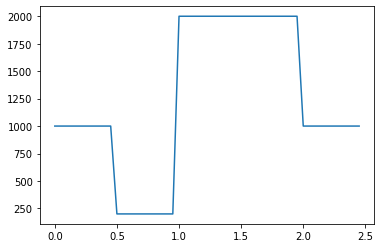

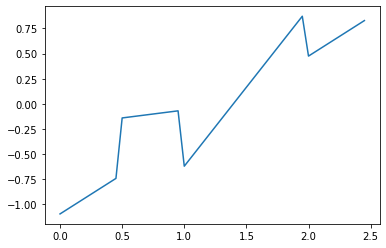

In [6]:
# функция зависимости модуля юнга от толщины
def Q(x):
    m = F * (L - x)
    return m
def E(t):
    if t < h or t >= 4 * h:
        E_org = E1
    elif t >= h and t < 2 * h:
        E_org = E2
    elif t >= 2 * h and t < 4 * h:
        E_org = E3
    return E_org
def sigma(x,t):
    return E(t) * Q(x) * (t - e) / (D)
t=[x/10 * h for x in range(0, 50, 1)]


plt.plot(t, list(map(E,t)))
plt.show()

plt.plot(t, [sigma(L/2,t) for t in t])
plt.show()

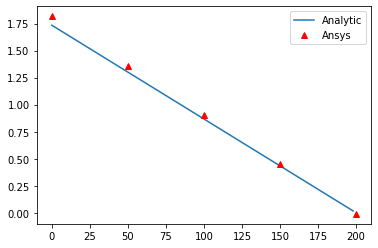

In [44]:
def sigma1(x):
    return 1000 * F * (L - x) * (5*h - e) / (D)


x1 = np.arange(0, L, 2)
y1 = sigma1(x)

x_ansys1 = [0,50,100,150,200]
y_ansys1 = [1.8171,1.3603,0.90341,0.44655,-0.010315]
plt.plot(x1, y1)
plt.plot(x_ansys1, y_ansys1, 'r^')
plt.legend(['Analytic','Ansys'])
plt.show()